In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

plotter = Plotter()

from fitv2 import *


import h5py


from scipy.optimize import curve_fit
from scipy.integrate import quad

from scipy.interpolate import interp1d
from scipy.optimize import minimize 


processedDataDir = "../data/processedv4/"

gdir = '../gnuplot_data/'

%load_ext gnuplot_kernel


dt=0.72

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The gnuplot_kernel extension is already loaded. To reload it, use:
  %reload_ext gnuplot_kernel


# Broken phase

In [3]:
dataminus = ConfResults(fn="../data/zminus2_N080_m-0499128_h003000_c00500.h5",thTime=1000,dt=dt, data_format="new", processedDir=processedDataDir, plotDir=gdir)

In [9]:
dataminus.load("OtOttp","A", direc=processedDataDir)
dataminus.load("OtOttp_blocks","A", direc=processedDataDir)
dataminus.load("OtOttp","dsigma", direc=processedDataDir)
dataminus.load("OtOttp_blocks","dsigma", direc=processedDataDir)
dataminus.load("OtOttp","phi", direc=processedDataDir)
dataminus.load("OtOttp_blocks","phi", direc=processedDataDir)

## Time correlator

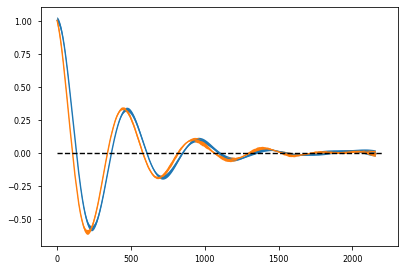

In [18]:
plotter.plot(dataminus,"OtOttp","A",tMax = 3000, yfact = 1.0 / 5.0)
plotter.plot(dataminus,"OtOttp","phi",tMax = 3000, yfact = 1.0 / np.real(dataminus.OtOttp['phi'].mean[0]))
#plotter.plot(dataminus,"OtOttp","dsigma",tMax = 2200, yfact = 1.0 / np.real(dataminus.OtOttp['dsigma'].mean[0]))
plt.plot([0,2200],[0,0],'--k')

In [11]:
dataminus.save("OtOttp","A", fmt = "gnuplot", yfact = 1.0 / 5.0)
dataminus.save("OtOttp","phi", fmt = "gnuplot", yfact = 1.0 / dataminus.OtOttp['phi'].mean[0])
dataminus.save("OtOttp","dsigma", fmt = "gnuplot", yfact = 1.0 / dataminus.OtOttp['dsigma'].mean[0])

## Statistical correlator

In [53]:
dataminus.computeStatisticalCor('A', omMax=0.2, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 /1800.0**2))

In [52]:
dataminus.computeStatisticalCor('phi', omMax=0.2, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 /1800.0**2))

/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


In [30]:
dataminus.computeStatisticalCor('dsigma', omMax=0.5, errFunc=lambda x: (np.mean(x,axis=0), np.std(x,axis=0)),  myTmax=20000.0, filterFunc=lambda x : np.exp(-x**2 /1800.0**2))

/Users/adrien/miniconda3/lib/python3.9/site-packages/scipy/interpolate/fitpack2.py:665: ComplexWarning: Casting complex values to real discards the imaginary part
  self._data = dfitpack.fpcurf0(x, y, k, w=w, xb=bbox[0],


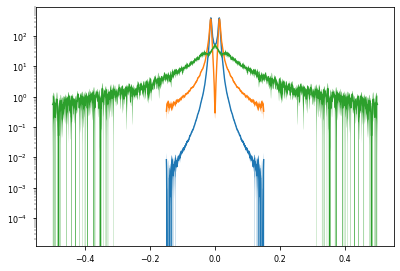

In [31]:
plotter.plot(dataminus, "OtOttpFourier", "A",  yfact = 1.0 / 5.0)
plotter.plot(dataminus, "OtOttpFourier", "phi",  yfact = 1.0 / np.real(dataminus.OtOttp['phi'].mean[0]))
plotter.plot(dataminus, "OtOttpFourier", "dsigma",  yfact = 1.0 / np.real(dataminus.OtOttp['dsigma'].mean[0]))

plt.yscale('log')

In [32]:
dataminus.save("OtOttpFourier","A", fmt = "gnuplot", yfact = 1.0 / 5.0)
dataminus.save("OtOttpFourier","phi", fmt = "gnuplot", yfact = 1.0 / dataminus.OtOttp['phi'].mean[0])
dataminus.save("OtOttpFourier","dsigma", fmt = "gnuplot", yfact = 1.0 / dataminus.OtOttp['dsigma'].mean[0])

### Fits

In [54]:
fitminus=Fitter(dataminus, chi0 = 5.0, chiperp = np.real(dataminus.OtOttp['phi'].mean[0]), L=80)

fitminus.setParValues("OtOttpFourier", "Aphi", [0.014,0.005])

fitminus.fit("OtOttpFourier", "Aphi")
fitminus.averagechi2reduce

{'OtOttpFourier': {'Aphi': 1.8460992935170222},
 'propagatorF': {},
 'propagator': {}}

[0.013522462275795233, 0.004825886961796533]


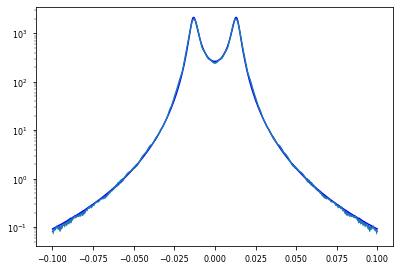

In [50]:
fitminus.setParValues("OtOttpFourier", "phi", fitminus.par["OtOttpFourier"]["Aphi"])
fitminus.setParValues("OtOttpFourier", "A", fitminus.par["OtOttpFourier"]["Aphi"])
fitminus.plot("OtOttpFourier","A")
plotter.plot(dataminus, "OtOttpFourier", "A")
plt.yscale('log')


[0.013522462275795233, 0.004825886961796533]


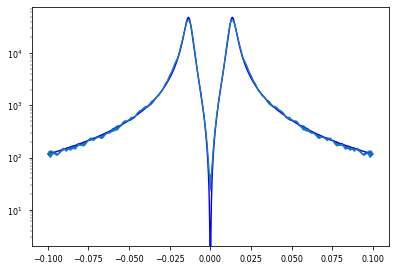

In [51]:
fitminus.plot("OtOttpFourier","phi")
plotter.plot(dataminus, "OtOttpFourier", "phi")
plt.yscale('log')


In [56]:
print(fitminus.par)
print(fitminus.parErr)
print(fitminus.averagechi2reduce)

{'OtOttpFourier': {'A': array([0., 0.]), 'phi': array([0., 0.]), 'dphi': array([0., 0.]), 'Aphi': [0.013521809143883567, 0.0048058526718381955]}, 'propagatorF': {'phi': array([0., 0.]), 'dsigma': array([0., 0.])}, 'propagator': {'phi': array([0., 0.])}}
{'OtOttpFourier': {'Aphi': array([4.50623905e-06, 4.41330218e-06])}, 'propagatorF': {}, 'propagator': {}}
{'OtOttpFourier': {'Aphi': 1.8460992935170222}, 'propagatorF': {}, 'propagator': {}}


## Static correlator and $f^2$, $m^2$, $\langle\phi_0\rangle$

In [57]:
dataminus.load("propagator", "phi", direc=processedDataDir)

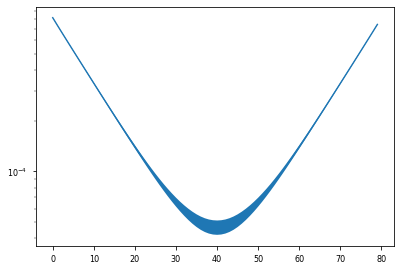

In [58]:
plotter.plot(dataminus,"propagator", "phi")
plt.yscale('log')

[1.0728964884982934, 0.08951397026849794]


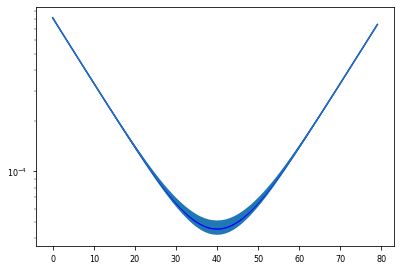

In [60]:
fitminus.setParValues("propagator", "phi", [1,0.1])
fitminus.fit("propagator", "phi",minInd = 0, maxInd = None)
fitminus.plot("propagator", "phi")
plotter.plot(dataminus,"propagator", "phi", yfact=1)
#plt.ylim([0.1,60])
plt.yscale('log')

In [65]:
dataminus.computeMean("phi0", lambda x, func : blocking(x,nBlock = 5, func=func))

In [78]:
print(dataminus.meanValues['phi0'].mean)
print(dataminus.meanValues['phi0'].err)

0.3490699025357364
3.248147898780166e-05


In [74]:
fitminus.par

{'OtOttpFourier': {'A': array([0., 0.]),
  'phi': array([0., 0.]),
  'dphi': array([0., 0.]),
  'Aphi': [0.013521809143883567, 0.0048058526718381955]},
 'propagatorF': {'phi': array([0., 0.]), 'dsigma': array([0., 0.])},
 'propagator': {'phi': [1.0728964884982934, 0.08951397026849794]}}

In [76]:
fitminus.parErr

{'OtOttpFourier': {'Aphi': array([4.50623905e-06, 4.41330218e-06])},
 'propagatorF': {},
 'propagator': {'phi': array([0.00402713, 0.00020594])}}

In [77]:
fitminus.averagechi2reduce

{'OtOttpFourier': {'Aphi': 1.8460992935170222},
 'propagatorF': {},
 'propagator': {'phi': 0.049128452685549925}}

## Results, summary


$$
\begin{array}{|c|c|}
\hline 
& \bf\text{ Simulation parameters}\\
\hline
T & -4.99128  \\
\hline
H & 0.003\\
\hline
z & -2.2011\\
\hline
\chi_0 & 5\\
\hline
\lambda & 4\\
\hline
D & 1/3\\
\hline
\end{array}
$$ 

$$
\begin{array}{|c|c|}
\hline 
& \bf\text{ Dynamic fit}\\
\hline
m_p & 0.013521\pm 0.00005  \\
\hline
\Gamma_p & 0.004806\pm 0.00004\\
\hline
\chi^2_{per\ dof} &  1.85 \\
\hline
\end{array}
$$ 

$$
\begin{array}{|c|c|}
\hline 
& \bf \text{Magnetization} \\
\hline
\langle \phi_0 \rangle & 0.34906\pm 0.00003\\
\hline
\end{array}
$$ 


$$
\begin{array}{|c|c|}
\hline 
& \bf \text{Static fit} \\
\hline
\frac{f^2}{\sigma^2} & 1.072 \pm 0.004\\
\hline
m & 0.0895 \pm 0.002\\
\hline
\chi^2_{per\ dof} &  0.05 \\
\hline
\end{array}
$$ 

We see the static correlator has overestimated errors. we could leave it like that and multiply the fit errors by the $\chi^2$.


$\frac{f^2 m^2}{\sigma^2} = \frac{H}{\sigma}$ is verified : 

In [79]:
1.072 * 0.0895**2

0.008586988

In [80]:
0.003 / 0.34906

0.008594510972325674